# Coursera data analysis

In [238]:
# modules we'll use
import pandas as pd
import numpy as np
from langdetect import detect
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [220]:
coursera = pd.read_csv('coursea_data.csv', index_col= 0)
coursera.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


# Data Cleaning

In [156]:
coursera.isnull().any()

course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

In [221]:
coursera.duplicated().any()

False

# How many observations are there ?

In [222]:
coursera.shape[0]

891

# How many features are there ?

In [251]:
coursera.shape[1]

7

# Which of these are numeric?

In [235]:
columns = coursera.columns
numeric_columns = coursera._get_numeric_data().columns
numeric_columns

Index(['course_rating', 'course_students_enrolled'], dtype='object')

# Which of there are categorical ?

In [236]:
categorical_columns = list(set(columns) - set(numeric_columns))
categorical_columns

['course_Certificate_type',
 'course_organization',
 'language',
 'course_title',
 'course_difficulty']

## Since the course students enrolled is displayed as a string we need to change it to a numerical value

In [243]:
replacement_dict = {'[k]': '*1e3', '[m]': '*1e6'}
coursera.course_students_enrolled = coursera['course_students_enrolled'].replace(replacement_dict, regex=True).map(pd.eval).astype(int)

### Describing the dataset

In [244]:
coursera.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,course_rating,course_students_enrolled
count,891.0,891.0
mean,4.7,90552.1
std,0.2,181936.5
min,3.3,1500.0
25%,4.6,17500.0
50%,4.7,42000.0
75%,4.8,99500.0
max,5.0,3200000.0


### Taking a look at the data after applying formatting for students enrolled

In [248]:
coursera.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,language
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300,en
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000,en
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000,en
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000,en
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000,en


# Normalizing and Scaling Data

## Scaling and normalizing the data for Course Rating

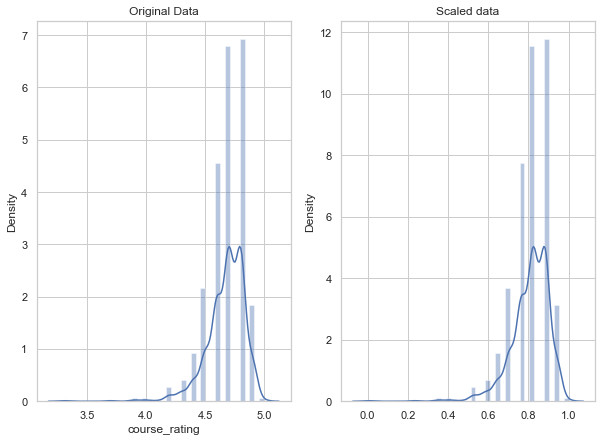

In [242]:
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(coursera['course_rating'], columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(coursera['course_rating'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

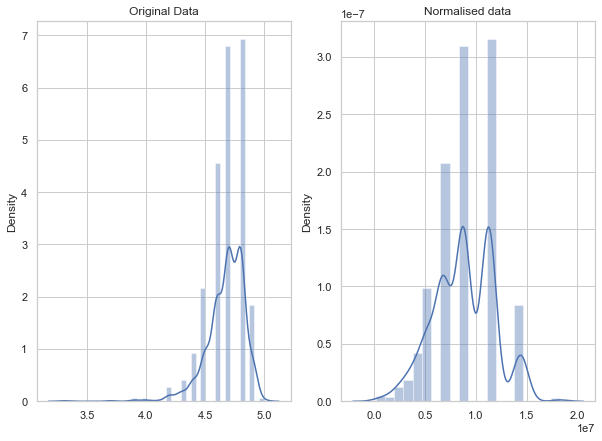

In [249]:
# Normalise the exponential data with boxcox
normalised_data = stats.boxcox(coursera['course_rating'])

fig, ax=plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [10, 7.00]
sns.distplot(coursera['course_rating'], ax=ax[0])
ax[0].set_title("Original Data")
ax[0].set(xlabel = '', ylabel='Density')
sns.distplot(normalised_data[0], ax=ax[1])
ax[1].set_title("Normalised data");

## Scaling and normalizing data of course students enrolled 

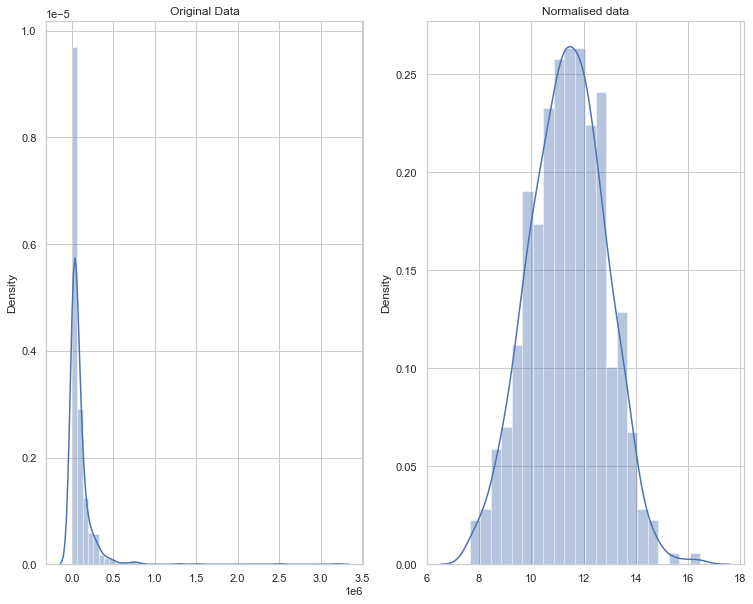

In [240]:
# Normalise the exponential data with boxcox
normalised_data = stats.boxcox(coursera['course_students_enrolled'])

# Plot both together to compare
fig, ax=plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [10, 7.00]
sns.distplot(coursera['course_students_enrolled'], ax=ax[0])
ax[0].set_title("Original Data")
ax[0].set(xlabel = '', ylabel='Density')
sns.distplot(normalised_data[0], ax=ax[1])
ax[1].set_title("Normalised data");

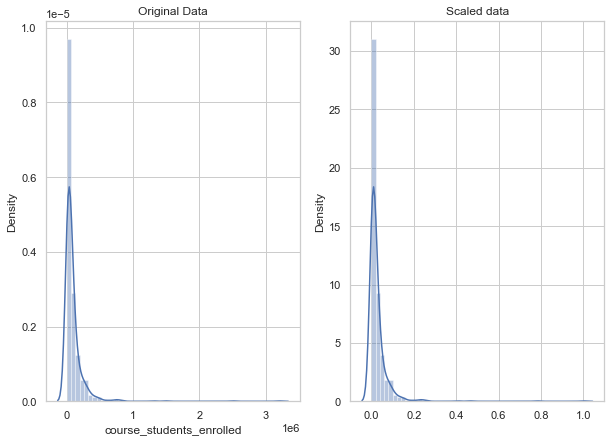

In [250]:
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(coursera['course_students_enrolled'], columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(coursera['course_students_enrolled'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

# Adding another feature named language taken from the course title

In [252]:
coursera['language'] = coursera['course_title'].apply(lambda x: detect(x))
coursera

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,language
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300,en
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000,en
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000,en
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000,en
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000,en
...,...,...,...,...,...,...,...
236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52000,ru
883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21000,bg
545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30000,ru
875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9800,ru


# Treating the outliers

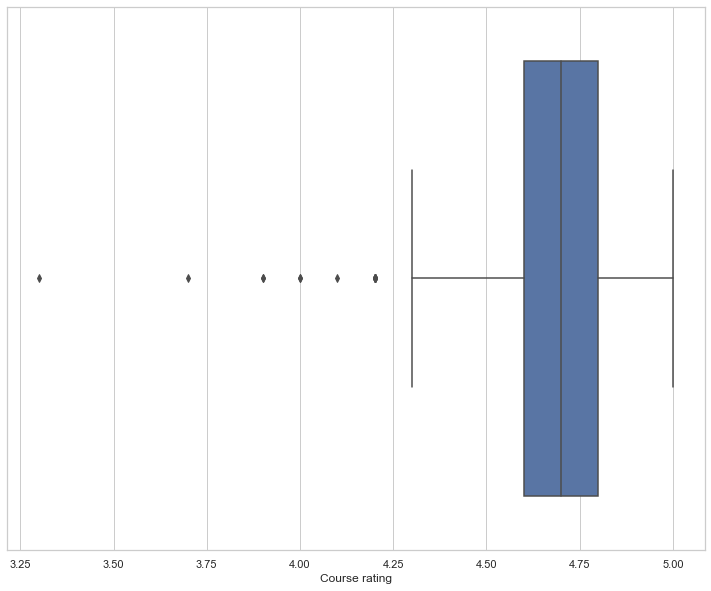

In [171]:
sns.set(rc={'figure.figsize':(12.5,10.0)})
sns.set_theme(style="whitegrid")
sns.boxplot(x=coursera['course_rating'])
plt.xlabel('Course rating')
plt.show()

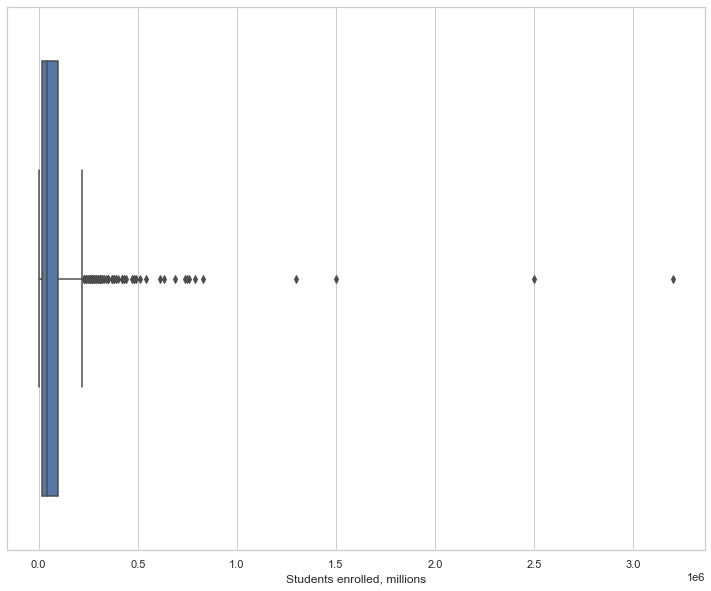

In [253]:
sns.set(rc={'figure.figsize':(12.5,10.0)})
sns.set_theme(style="whitegrid") 
sns.boxplot(x=coursera["course_students_enrolled"])
plt.xlabel('Students enrolled, millions')
plt.show()

# Grouping course organizations by the number of published courses

In [254]:
organisation_courses = coursera.groupby('course_organization')['course_title'].count().sort_values(ascending=False)

# How many different organizations in the course ?

In [255]:
organisation_courses.count()

154

# Top 10 organizations with published courses

In [261]:
top_ten_organisations = organisation_courses.head(10)
top_ten_organisations

course_organization
University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Duke University                               28
Johns Hopkins University                      28
University of California, Irvine              27
University of Illinois at Urbana-Champaign    22
IBM                                           22
University of California, Davis               21
University of Colorado Boulder                19
Name: course_title, dtype: int64

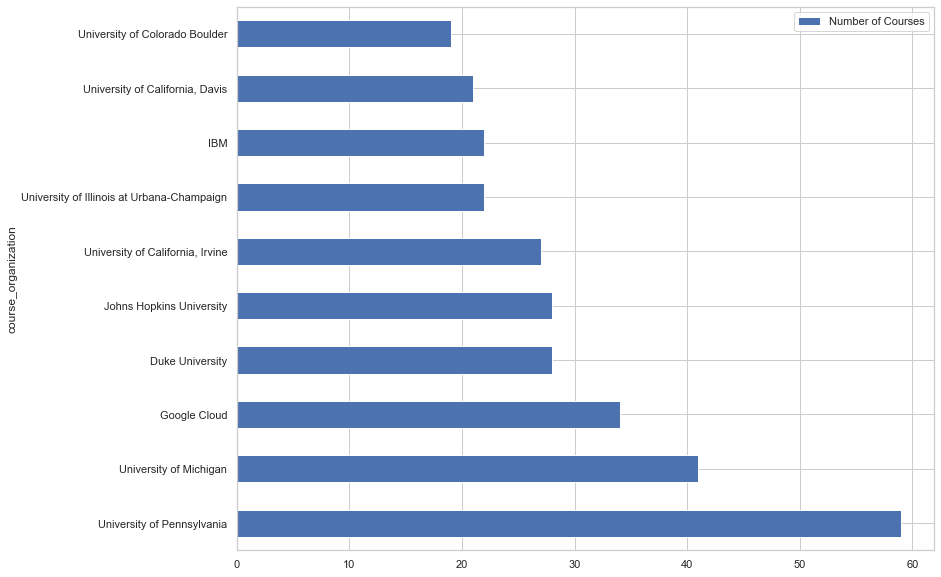

In [262]:
ax = top_ten_organisations.plot.barh(x = 'course_title')
plt.legend(['Number of Courses'], loc = 'best')
plt.show()

 # 7 most prevalent languages on coursera by percentage  

In [265]:
unique_languages = coursera['language'].value_counts()
top_seven_language_percentages = (unique_languages.nlargest(7)/unique_languages.sum())*100
language_names = ['en','es','fr','it','de','ru','nl']
top_seven_language_percentages

en    81.032548
es     5.274972
fr     2.020202
it     1.795735
ru     1.571268
de     1.346801
nl     1.346801
Name: language, dtype: float64

## How many unique languages are there ?

In [266]:
unique_languages.count()

20

## Graphing the 7 most prevalent languages and taking a look at their percentage

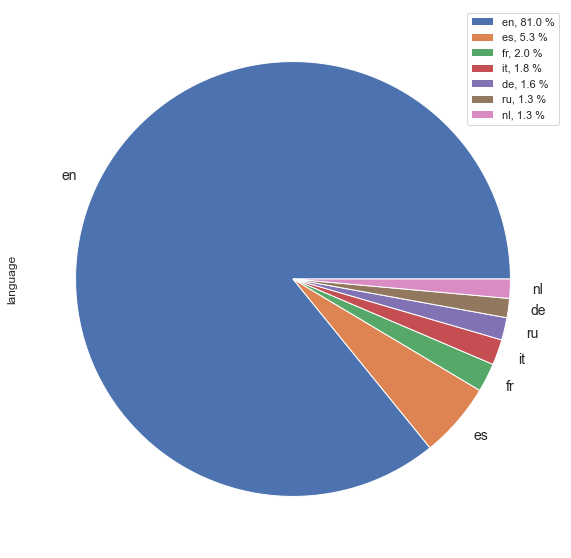

In [267]:
coursera['language'].value_counts().nlargest(7).plot.pie(textprops={'fontsize': 14})
plt.legend(loc = 'best',  labels = ['%s, %1.1f %%' % (l, s) for l, s in zip(language_names, top_seven_language_percentages)])
plt.rcParams['legend.fontsize'] = 15
plt.show()

# Top 10 rated courses

In [268]:
course_ratings = coursera.groupby('course_title')['course_rating'].mean().sort_values(ascending = False)
top_ten_rated_courses = course_ratings.head(10)
top_ten_rated_courses

course_title
Infectious Disease Modelling                                                                    5.0
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho                        5.0
Stories of Infection                                                                            4.9
Boosting Creativity for Innovation                                                              4.9
Brand Management: Aligning Business, Brand and Behaviour                                        4.9
Understanding Einstein: The Special Theory of Relativity                                        4.9
Bugs 101: Insect-Human Interactions                                                             4.9
Build a Modern Computer from First Principles: From Nand to Tetris (Project-Centered Course)    4.9
Introduction to Psychology                                                                      4.9
Everyday Parenting: The ABCs of Child Rearing                                          

# Top 10 rated courses from organizations with more than 10 courses published

In [272]:
top_ten_organisations = coursera.groupby("course_organization").agg({"course_rating" : "mean", "course_title" : "count"}).sort_values("course_title", ascending=False).reset_index()
top_ten_organisations = top_ten_organisations[top_ten_organisations["course_title"] > 10]
top_ten_organisations.rename(columns={'course_title':'number_of_published_courses'}, inplace=True)
top_ten_organisations.nlargest(10,columns = ['course_rating'])

,course_organization,course_rating,number_of_published_courses
11,Yale University,4.817647,17
15,Berklee College of Music,4.807143,14
13,Stanford University,4.768750,16
14,Universidad Nacional Autónoma de México,4.750000,14
12,deeplearning.ai,4.743750,16
1,University of Michigan,4.729268,41
19,University of Alberta,4.727273,11
10,University of Virginia,4.715789,19
17,University of Colorado System,4.715385,13
0,University of Pennsylvania,4.696610,59


# Most popular courses

In [184]:
most_popular_courses = coursera[['course_title', 'course_students_enrolled']].nlargest(10, columns = ['course_students_enrolled'])
most_popular_courses

,course_title,course_students_enrolled
6,Machine Learning,3200000
2,The Science of Well-Being,2500000
3,Python for Everybody,1500000
47,Programming for Everybody (Getting Started wit...,1300000
13,Data Science,830000
44,Career Success,790000
175,English for Career Development,760000
40,Successful Negotiation: Essential Strategies a...,750000
15,Data Science: Foundations using R,740000
5,Deep Learning,690000


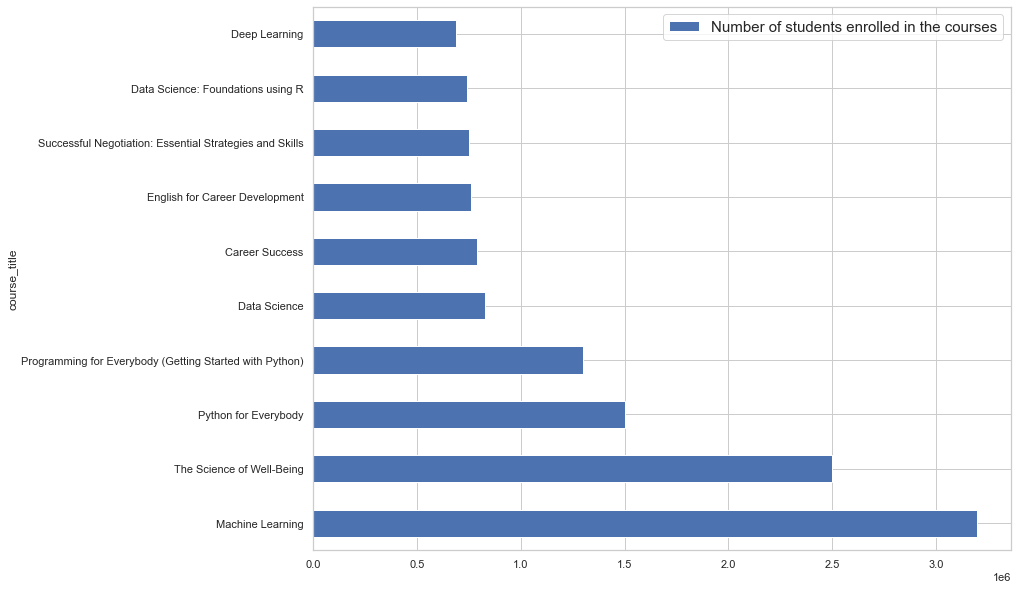

In [273]:
ax = most_popular_courses.plot.barh(x = 'course_title')
plt.legend(['Number of students enrolled in the courses'], loc = 'best')
plt.show()

# Looking for correlations

In [274]:
coursera.corr()

,course_rating,course_students_enrolled
course_rating,1.00000,0.07109
course_students_enrolled,0.07109,1.00000


# How many courses of each difficulty are there ?

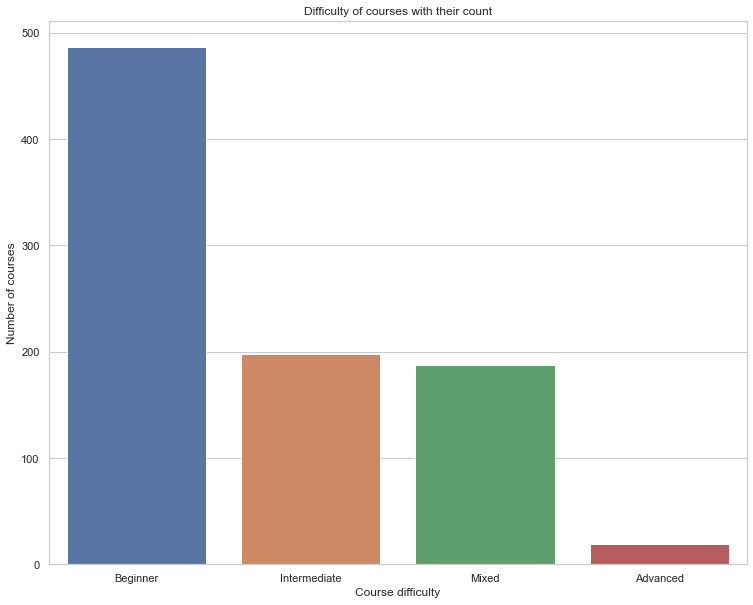

In [275]:
sb.countplot(x='course_difficulty', data=coursera)
sb.set_style("whitegrid")
plt.xlabel('Course difficulty')
plt.ylabel('Number of courses')
plt.title("Difficulty of courses with their count")
plt.show()

# Course difficulty in percentages

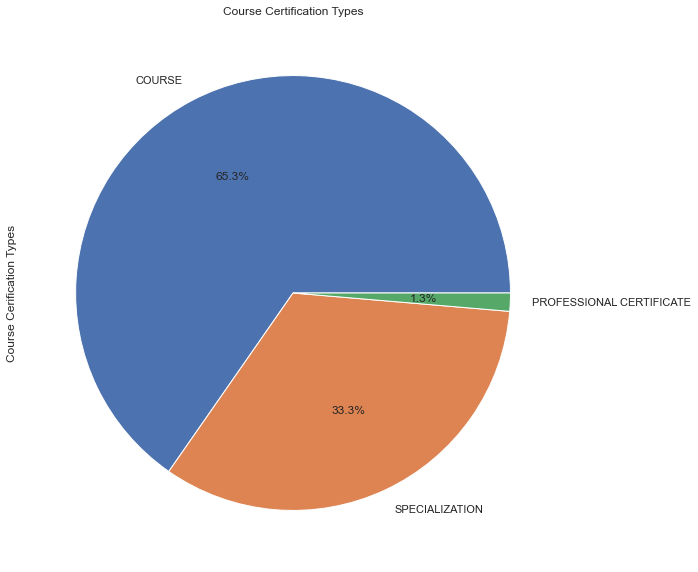

In [276]:
ax= coursera['course_Certificate_type'].value_counts(ascending=False).plot.pie(
            autopct='%1.1f%%',
            figsize=(15, 10))
plt.title('Course Certification Types') 
plt.ylabel('Course Cerification Types')
plt.show()

# Looking for familiarities between students enrolled and the course rating

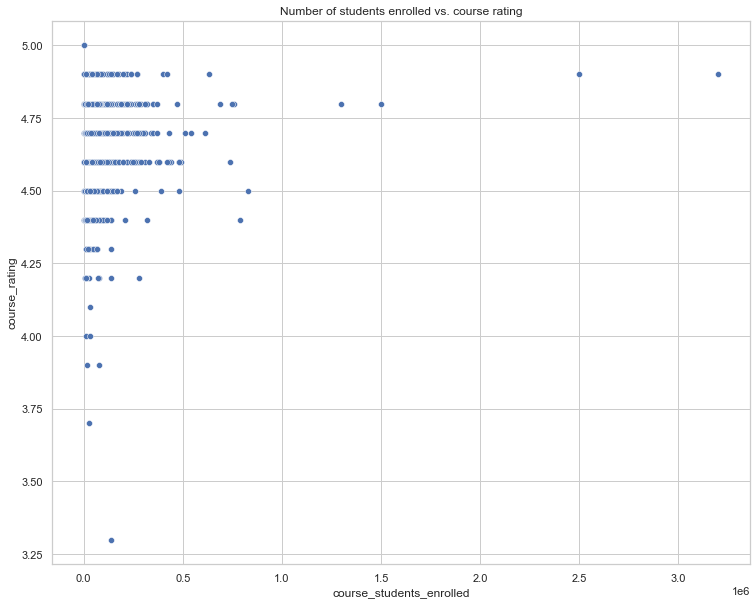

In [277]:
scttr = sb.scatterplot(data=coursera, 
                x="course_students_enrolled", y="course_rating").set(
                title='Number of students enrolled vs. course rating')
plt.show()

# Looking for most common words in the course titles

In [216]:
from collections import Counter
most_common_words = Counter(" ".join(coursera['course_title']).split()).most_common(100)
most_common_words

[('and', 222),
 ('to', 109),
 ('for', 104),
 ('Introduction', 75),
 ('of', 73),
 ('Data', 69),
 ('with', 63),
 ('in', 60),
 ('The', 47),
 ('Management', 46),
 ('the', 43),
 ('Science', 36),
 ('Business', 36),
 ('Python', 34),
 ('Learning', 32),
 ('Health', 31),
 ('Google', 29),
 ('Fundamentals', 28),
 ('Design', 28),
 ('Cloud', 26),
 ('&', 26),
 ('de', 25),
 ('Machine', 24),
 ('Development', 24),
 ('a', 24),
 ('Programming', 20),
 ('English', 19),
 ('Marketing', 19),
 ('Analysis', 18),
 ('Social', 18),
 ('Foundations', 17),
 ('Strategy', 17),
 ('International', 17),
 ('y', 16),
 ('Financial', 16),
 ('Law', 15),
 ('Global', 15),
 ('Analytics', 14),
 ('Skills', 14),
 ('la', 14),
 ('Engineering', 13),
 ('Public', 13),
 ('Digital', 13),
 ('Systems', 12),
 ('A', 12),
 ('Platform', 12),
 ('Finance', 12),
 ('Understanding', 12),
 ('Your', 11),
 ('Leadership', 11),
 ('AI', 10),
 ('en', 10),
 ('Thinking', 10),
 ('Statistics', 10),
 ('Innovation', 10),
 ('What', 10),
 ('Excel', 10),
 ('Music', 1

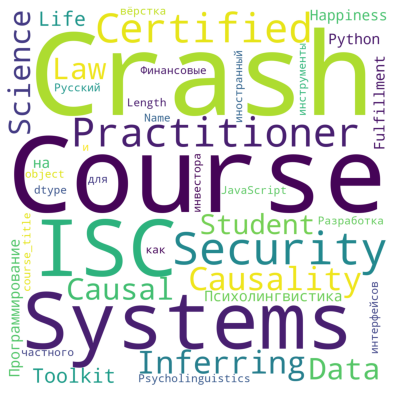

In [247]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 1500, height = 1500, 
            background_color ='white', 
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(str(coursera['course_title']))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()